# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
banner id:          904424099
verification code:  cedc6b94c85d

```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2618 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1002,2025-11-14 06:04:00,Downtown,104,1.0,3.07,Mobile,True
1,1004,2025-11-14 06:34:00,Campus,104,1.0,2.13,Credit,False
2,1003,2025-11-14 06:43:00,Campus,103,1.0,4.34,Mobile,True
3,1000,2025-11-14 06:44:00,Campus,111,1.0,3.15,Credit,False
4,1001,2025-11-14 06:46:00,Downtown,114,1.0,5.15,Credit,True


In [2]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [3]:
# Task 1: use isna(), nunique(), min/max on timestamp
# 1) Missing values per column
print("Missing values per column:")
print(sales.isna().sum())
print()

# 2) Unique product IDs vs catalog size
unique_ids = sales['product_id'].nunique()
catalog_size = len(products)
print(f"Unique product IDs in sales: {unique_ids}")
print(f"Product catalog size: {catalog_size}")
print()

# 3) Date range of transactions
earliest = sales['timestamp'].min()
latest = sales['timestamp'].max()
print(f"Earliest transaction: {earliest}")
print(f"Latest transaction:   {latest}")


Missing values per column:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          5
revenue           5
payment_method    0
loyalty_member    0
dtype: int64

Unique product IDs in sales: 21
Product catalog size: 18

Earliest transaction: 2025-11-14 06:04:00
Latest transaction:   2025-11-27 21:53:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [4]:
# Task 2: use pd.merge() with appropriate join type

sales_merged = pd.merge(
    sales,
    products,
    on='product_id',
    how='left'
)

sales_merged.head()



,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1002,2025-11-14 06:04:00,Downtown,104,1.0,3.07,Mobile,True,Americano,Coffee,1.0
1,1004,2025-11-14 06:34:00,Campus,104,1.0,2.13,Credit,False,Americano,Coffee,1.0
2,1003,2025-11-14 06:43:00,Campus,103,1.0,4.34,Mobile,True,Latte,Coffee,1.9
3,1000,2025-11-14 06:44:00,Campus,111,1.0,3.15,Credit,False,Croissant,Pastry,1.0
4,1001,2025-11-14 06:46:00,Downtown,114,1.0,5.15,Credit,True,Cinnamon Roll,Pastry,1.4


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [5]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs
# 1) Compare shapes
print("Original sales shape:", sales.shape)
print("Merged   sales shape:", sales_merged.shape)
print()

# 2) Check for missing values in product columns
product_cols = ["name", "category", "cost"]
print("Missing values in product columns:")
print(sales_merged[product_cols].isna().sum())
print()

# 3) Identify problematic product_id(s) if missing values exist
problem_rows = sales_merged[sales_merged[product_cols].isna().any(axis=1)]

if problem_rows.empty:
    print("No missing values in product columns. Merge looks good!")
else:
    print("Rows with missing product info:")
    display(problem_rows.head())

    print("\nProblematic product_id values:")
    print(problem_rows["product_id"].unique())



Original sales shape: (2618, 8)
Merged   sales shape: (2618, 11)

Missing values in product columns:
name        9
category    9
cost        9
dtype: int64

Rows with missing product info:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
156,1171,2025-11-14 12:32:00,Downtown,199,1.0,10.53,Credit,False,NaN,NaN,NaN
403,1403,2025-11-15 18:11:00,Campus,199,1.0,3.30,Cash,False,NaN,NaN,NaN
994,1985,2025-11-19 09:46:00,Campus,201,1.0,2.36,Mobile,False,NaN,NaN,NaN
1156,2151,2025-11-20 07:56:00,Downtown,201,1.0,5.39,Mobile,False,NaN,NaN,NaN
1272,2264,2025-11-20 13:35:00,Campus,200,1.0,6.56,Mobile,True,NaN,NaN,NaN



Problematic product_id values:
[199 201 200]


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [6]:
# Task 4: create profit column, then groupby with .agg()

# 1) Calculate profit for each transaction
sales_merged["profit"] = sales_merged["revenue"] - (sales_merged["cost"] * sales_merged["quantity"])

# 2) Group by product category and summarize:
category_profit = sales_merged.groupby("category").agg(
    total_profit=("profit", "sum"),           # total profit per category
    transaction_count=("profit", "count")     # number of rows per category
)
# 3) Sort categories by total profit (highest first)
category_profit = category_profit.sort_values("total_profit", ascending=False)

# Show the final table
category_profit


,total_profit,transaction_count
category,,
Sandwich,4103.50,580
Coffee,2303.02,939
Pastry,1410.45,494
Tea,865.14,586


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [7]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()
# Group by both category and location
category_location_profit = sales_merged.groupby(["category", "location"]).agg(
    total_profit=("profit", "sum"),        # total profit for that category-location combo
    avg_profit=("profit", "mean"),         # average profit per transaction
    transaction_count=("profit", "count")  # number of transactions
)

# Turn the multi-index into regular columns
category_location_profit = category_location_profit.reset_index()

# Sort (I added this)
category_location_profit = category_location_profit.sort_values(
    "total_profit", ascending=False
)

category_location_profit


,category,location,total_profit,avg_profit,transaction_count
7,Sandwich,Downtown,2431.16,7.842452,310
1,Coffee,Downtown,1094.65,3.032271,361
0,Coffee,Campus,1032.43,2.048472,504
8,Sandwich,Suburb,984.89,6.985035,141
6,Sandwich,Campus,687.45,5.329070,129
4,Pastry,Downtown,582.23,3.424882,170
3,Pastry,Campus,533.65,2.447936,218
11,Tea,Suburb,390.01,1.494291,261
5,Pastry,Suburb,294.57,2.778962,106
10,Tea,Downtown,285.79,1.775093,161


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

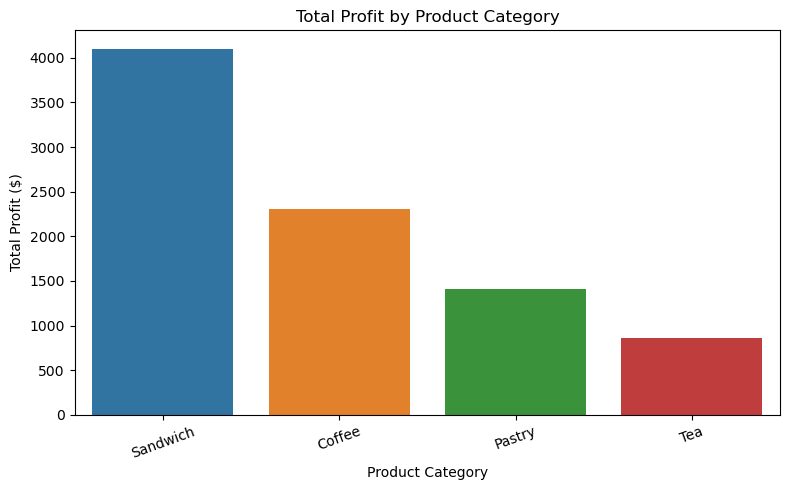

In [8]:
# Task 6: use sns.barplot() with aggregated data
# 1) First, compute total profit by category
category_profit_plot = sales_merged.groupby("category")["profit"].sum().reset_index()

# 2) Sort by profit so the chart looks nicer
category_profit_plot = category_profit_plot.sort_values("profit", ascending=False)

# 3) Create barplot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=category_profit_plot,
    x="category",
    y="profit",
    hue="category",
    legend=False
)

# 4) Labels and title
plt.xlabel("Product Category")
plt.ylabel("Total Profit ($)")
plt.title("Total Profit by Product Category")

# 5) Rotate labels
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()



## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

### Interpretation

#### 1) Why verifying the merge in Task 3 matters  
If I Have not checked the merge, I could have continued with wrong or missing product information. The missing names, the missing category for the product, or even the cost would change profit and category totals. I also discovered three product IDs (199, 200, 201) that did not exist in the product catalog, which would have caused the sums to be incorrect.

#### 2) How different aggregation levels changed what I could learn  
I could only aggregate by `category`, which gave me a high level view of which product categories were the most profitable.
I broke it down by `category and location`. I could see that each category was profitable for Downtown locations or Campus locations and Downtown customers or Campus customers. It helped me see not only *which* products were profitable but also *where* the profits came from within.

#### 3) Key patterns and insights  
- Total **sandwich** profits reached about $4100.
- The most transacted item was **Coffee**, with a total of 939, making it a relatively high-volume, low-profit item.
- **Pastry and Tea** follow in total profit.
- A number of product IDs were missing, pointing to gaps in product tracking.

The sandwiches and the overall food offerings are profitable, but the drink sales vary widely.

#### 4) Recommendation to improve profitability  
The most impactful move was to **promote the sandwich category** as sandwiches generated the most profit ($4103.50), twice that of coffee. A rise in sandwich sales would increase profit greatly.

**Actionable ideas:**
- New sandwich options.
- Bundle a high-margin, high-volume item such as a **sandwich with coffee** to help increase sales.
- Focus more on sandwiches at the Campus location, where volume is lower and sandwiches are profitable.

**Additional analysis worth exploring:**
- Profitability by time of day or day of week.
- Loyalty-member purchasing patterns.
- Price optimization for very low-margin products, such as tea.


## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

### Question  
**Which hours of the day generate the highest total profit, and do the two locations show different hourly patterns?**


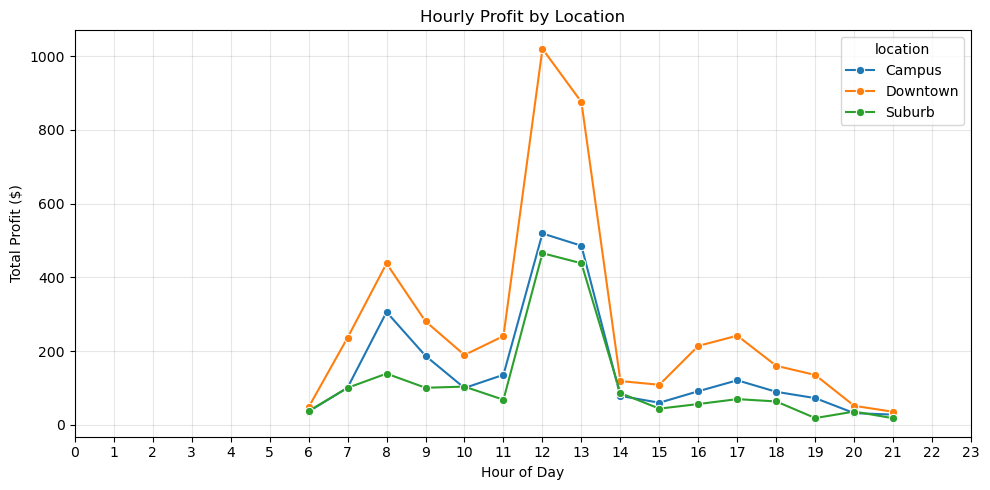

,hour,profit
0,6,121.49
1,7,437.66
2,8,882.57
3,9,568.42
4,10,393.17
5,11,444.58
6,12,2004.11
7,13,1799.30
8,14,283.42
9,15,212.75


In [9]:
# Code 
# Create an hour column
sales_merged["hour"] = sales_merged["timestamp"].dt.hour

# Compute total profit per hour and per location
hourly_profit = sales_merged.groupby(["hour", "location"])["profit"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=hourly_profit,
    x="hour",
    y="profit",
    hue="location",
    marker="o"
)

plt.title("Hourly Profit by Location")
plt.xlabel("Hour of Day")
plt.ylabel("Total Profit ($)")
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Compute overall hourly pattern (both locations combined together)
hourly_overall = sales_merged.groupby("hour")["profit"].sum().reset_index()
hourly_overall

### Your Findings

*Bonus findings here (state your question and what you discovered)*
### Question  
**Which hours of the day generate the highest total profit, and do the two locations show different hourly patterns?**
### Summary
The analysis shows that profitability peaks strongly during the **late morning and lunchtime hours (10 AM–1 PM)**. This pattern is driven mainly by sandwich sales, which are more popular during meal times. Downtown shows slightly stronger profit in the early afternoon, while Campus leads during the mid-morning hours. Overall, the shop earns most of its profit during daytime meal periods rather than early morning or evening.


## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.